<a href="https://colab.research.google.com/github/Gabriele90/ML-for-the-life-sciences-/blob/main/model_comparison(3class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-profiling

In [ ]:
import pandas_profiling

In [ ]:
from sklearn import model_selection, preprocessing, metrics, linear_model, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import ensemble
from imblearn.under_sampling import AllKNN
import pandas as pd, numpy, string
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import time, math
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV

In [ ]:
df_raw = pd.read_csv("phosphatase3class.csv")

In [ ]:
print("keys:",df_raw.keys())
print("shape:",df_raw.shape)

keys: Index(['Unnamed: 0', 'molecule_chembl_id', 'canonical_smiles', 'Class', 'MW',
       'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50'],
      dtype='object')
shape: (801, 9)


In [ ]:
df_no_Unnamed = df_raw.drop(columns='Unnamed: 0')

In [ ]:
df_no_can = df_no_Unnamed.drop(columns='molecule_chembl_id')

In [ ]:
df = df_no_can.drop(columns='canonical_smiles')

In [ ]:
df.head(5)

,Class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,inactive,434.513,2.7709,3.0,6.0,3.000000
1,inactive,412.466,4.3513,1.0,5.0,3.675718
2,inactive,420.486,2.6825,4.0,5.0,3.000000
3,inactive,412.466,4.3513,1.0,5.0,3.000000
4,intermediate,427.477,3.8469,3.0,5.0,5.124939


In [ ]:
df.describe()

,MW,LogP,NumHDonors,NumHAcceptors,pIC50
count,801.000000,801.000000,801.000000,801.000000,801.000000
mean,377.194076,3.431050,1.483146,5.091136,4.799892
std,100.248573,1.659214,0.956571,1.988199,0.899027
min,112.128000,-1.816800,0.000000,0.000000,3.000000
25%,305.374000,2.397540,1.000000,4.000000,4.000000
50%,373.481000,3.356220,1.000000,5.000000,4.322393
75%,444.440000,4.440220,2.000000,6.000000,5.554396
max,1085.631000,11.793900,9.000000,11.000000,7.841638


In [ ]:
df.isnull().sum()

Class            0
MW               0
LogP             0
NumHDonors       0
NumHAcceptors    0
pIC50            0
dtype: int64

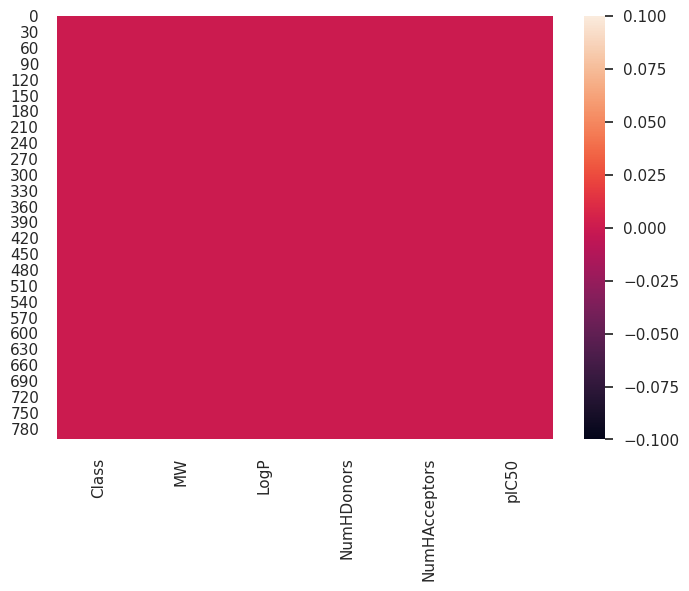

In [ ]:
sns.heatmap(df.isnull())
plt.show()


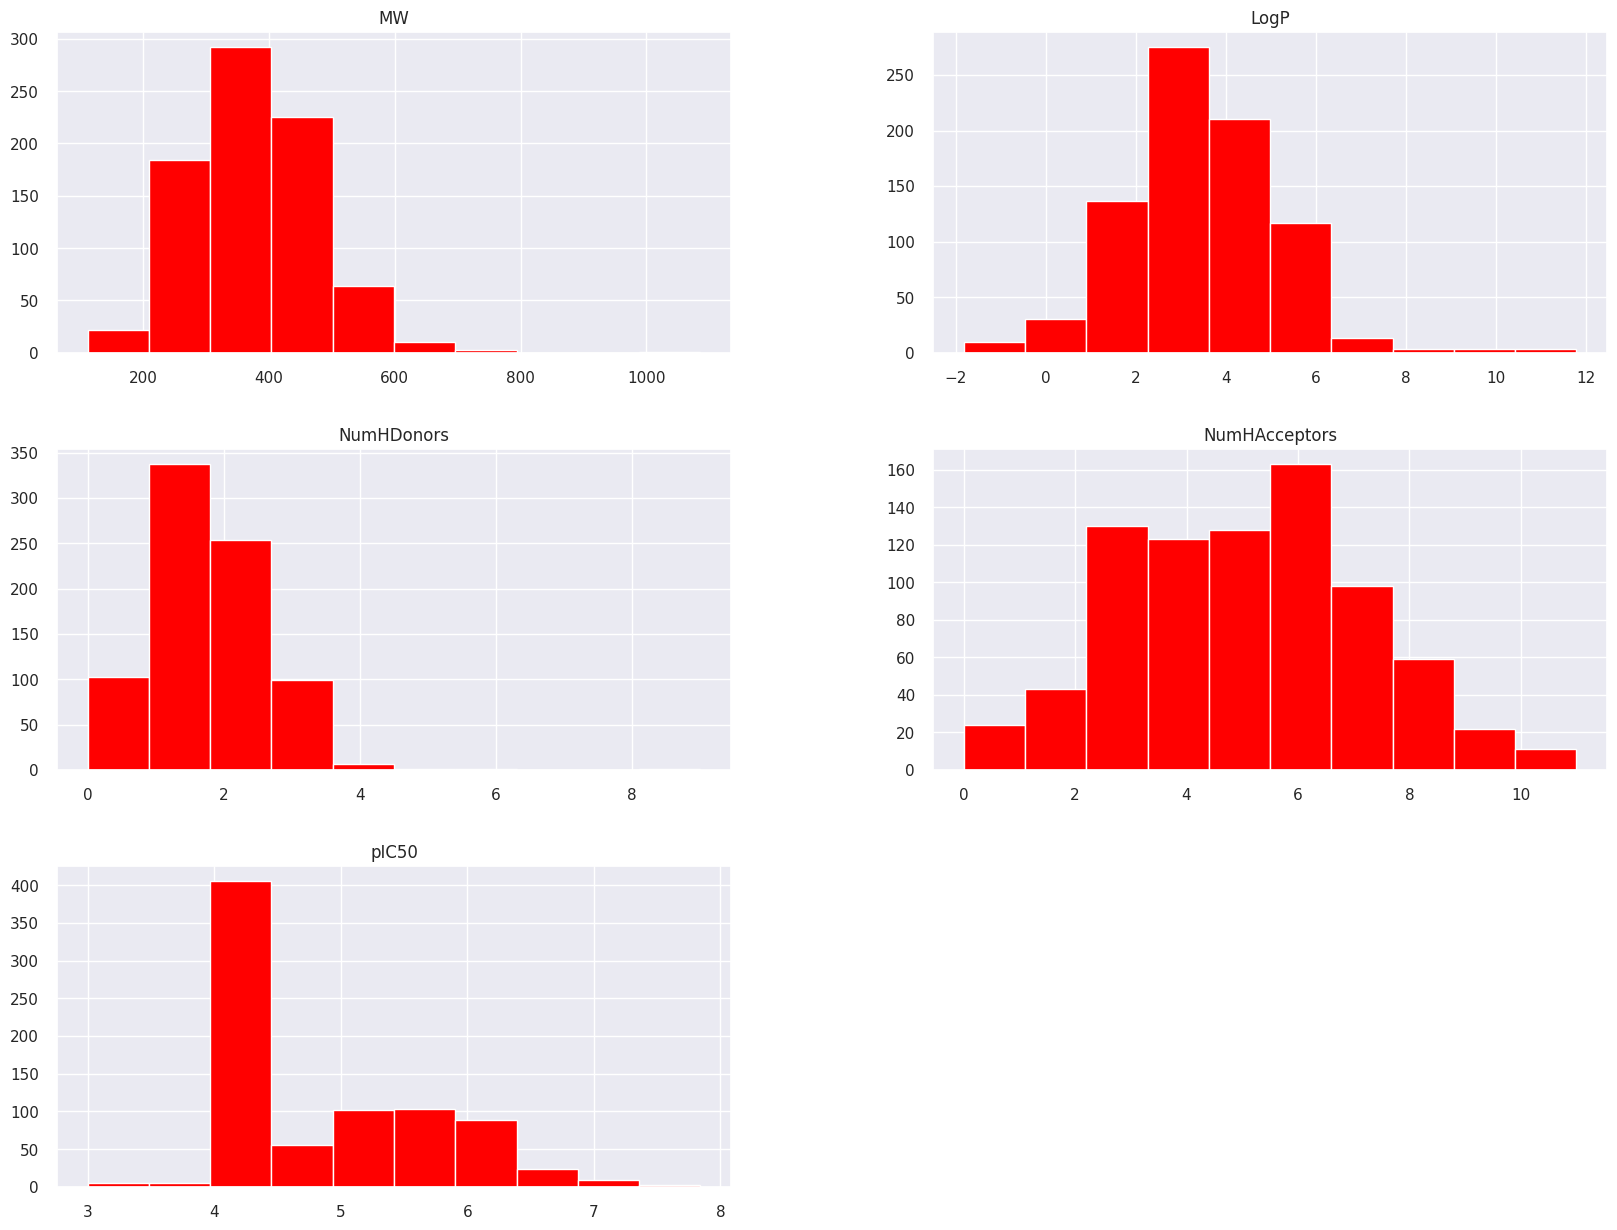

In [ ]:
df.hist(color='red', figsize=(20,15));

In [ ]:
mw_zeros = df[df['MW'] == 0].shape[0]
log_zeros = df[df['LogP'] == 0].shape[0]
hdon_zeros = df[df['NumHDonors'] == 0].shape[0]
hacc_zeros = df[df['NumHAcceptors'] == 0].shape[0]
pIC_zeros = df[df['pIC50'] == 0].shape[0]
print(f"Number of zeros 'MW' column have : {mw_zeros}")
print(f"Number of zeros 'LogP' column have : {log_zeros}")
print(f"Number of zeros 'NumHDonors' column have : {hdon_zeros}")
print(f"Number of zeros 'NumHAcceptors' column have : {hacc_zeros}")
print(f"Number of zeros 'pIC50' column have : {pIC_zeros}")


Number of zeros 'MW' column have : 0
Number of zeros 'LogP' column have : 0
Number of zeros 'NumHDonors' column have : 102
Number of zeros 'NumHAcceptors' column have : 1
Number of zeros 'pIC50' column have : 0


In [ ]:
df2 = df.copy()

In [ ]:
df2['NumHDonors'].replace(0, df2['NumHDonors'].mean(), inplace=True)

In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
MW,801.0,377.194076,100.248573,112.1280,305.37400,373.481000,444.440000,1085.631000
LogP,801.0,3.431050,1.659214,-1.8168,2.39754,3.356220,4.440220,11.793900
NumHDonors,801.0,1.672011,0.773853,1.0000,1.00000,1.483146,2.000000,9.000000
NumHAcceptors,801.0,5.091136,1.988199,0.0000,4.00000,5.000000,6.000000,11.000000
pIC50,801.0,4.799892,0.899027,3.0000,4.00000,4.322393,5.554396,7.841638


Text(0, 0.5, 'MW value')

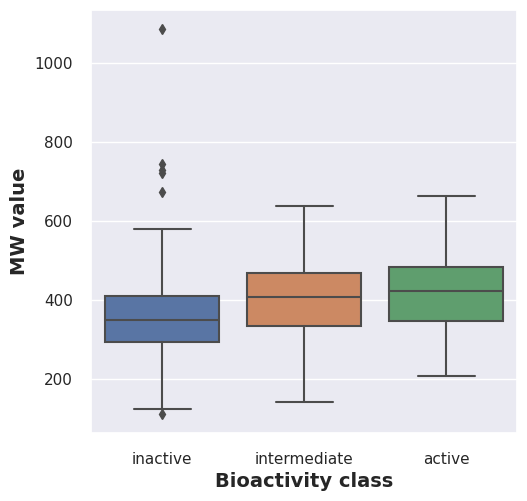

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Class', y = 'MW', data = df2)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW value', fontsize=14, fontweight='bold')


Text(0, 0.5, 'LogP value')

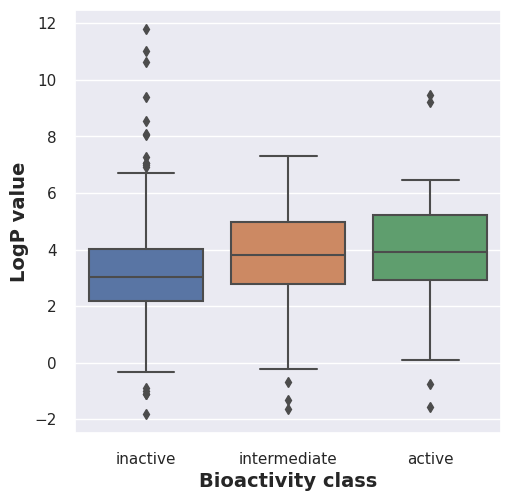

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Class', y = 'LogP', data = df2)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP value', fontsize=14, fontweight='bold')

Text(0, 0.5, 'Hdon value')

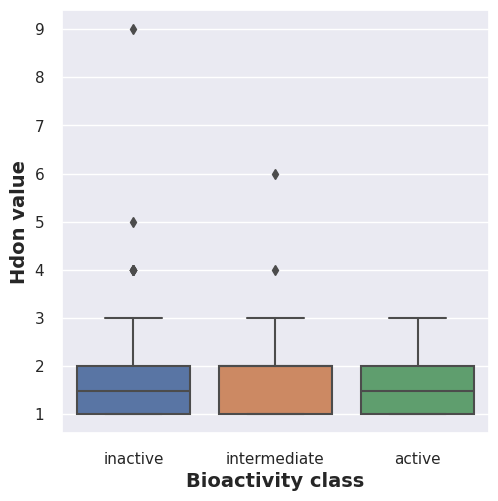

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Class', y = 'NumHDonors', data = df2)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Hdon value', fontsize=14, fontweight='bold')

Text(0, 0.5, 'Hacc value')

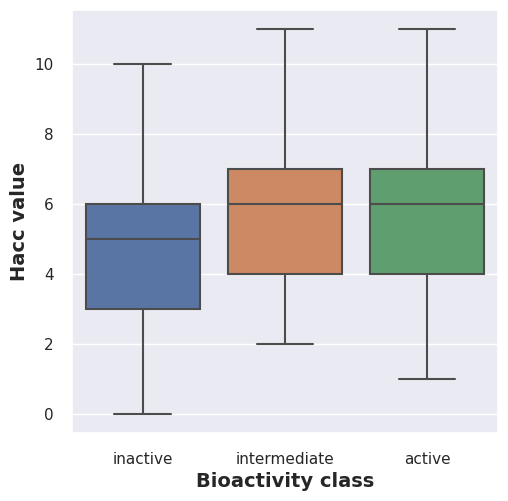

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Class', y = 'NumHAcceptors', data = df2)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Hacc value', fontsize=14, fontweight='bold')

Text(0, 0.5, 'pIC50 value')

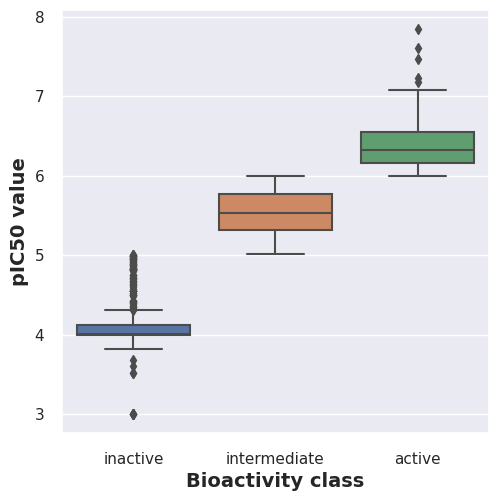

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Class', y = 'pIC50', data = df2)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

In [ ]:
Q1 = df2.quantile(0.25)
Q2 = df2.quantile(0.75)
IQR = Q2 - Q1
IQR

MW               139.066000
LogP               2.042680
NumHDonors         1.000000
NumHAcceptors      2.000000
pIC50              1.554396
dtype: float64

In [ ]:
df2_out = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q2 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df2_out.shape

(758, 6)

Text(0, 0.5, 'pIC50 value')

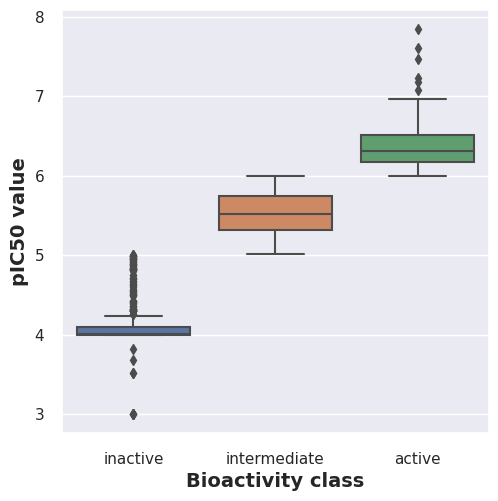

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Class', y = 'pIC50', data = df2_out)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

Text(0, 0.5, 'MW value')

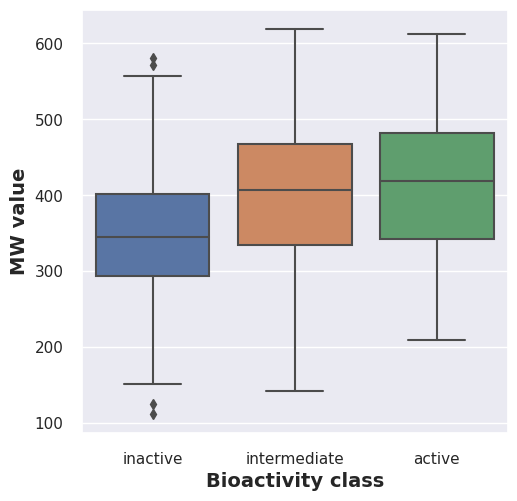

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Class', y = 'MW', data = df2_out)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW value', fontsize=14, fontweight='bold')

Text(0, 0.5, 'LogP value')

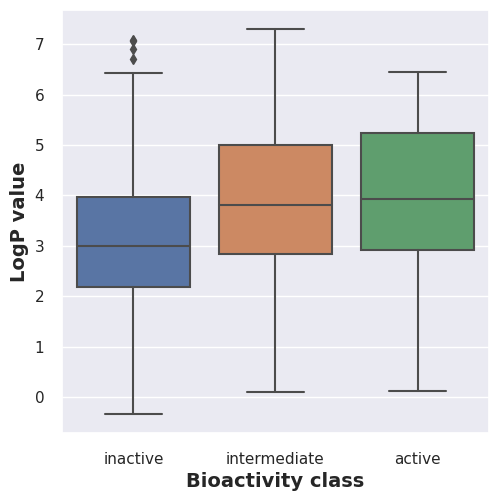

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'Class', y = 'LogP', data = df2_out)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP value', fontsize=14, fontweight='bold')

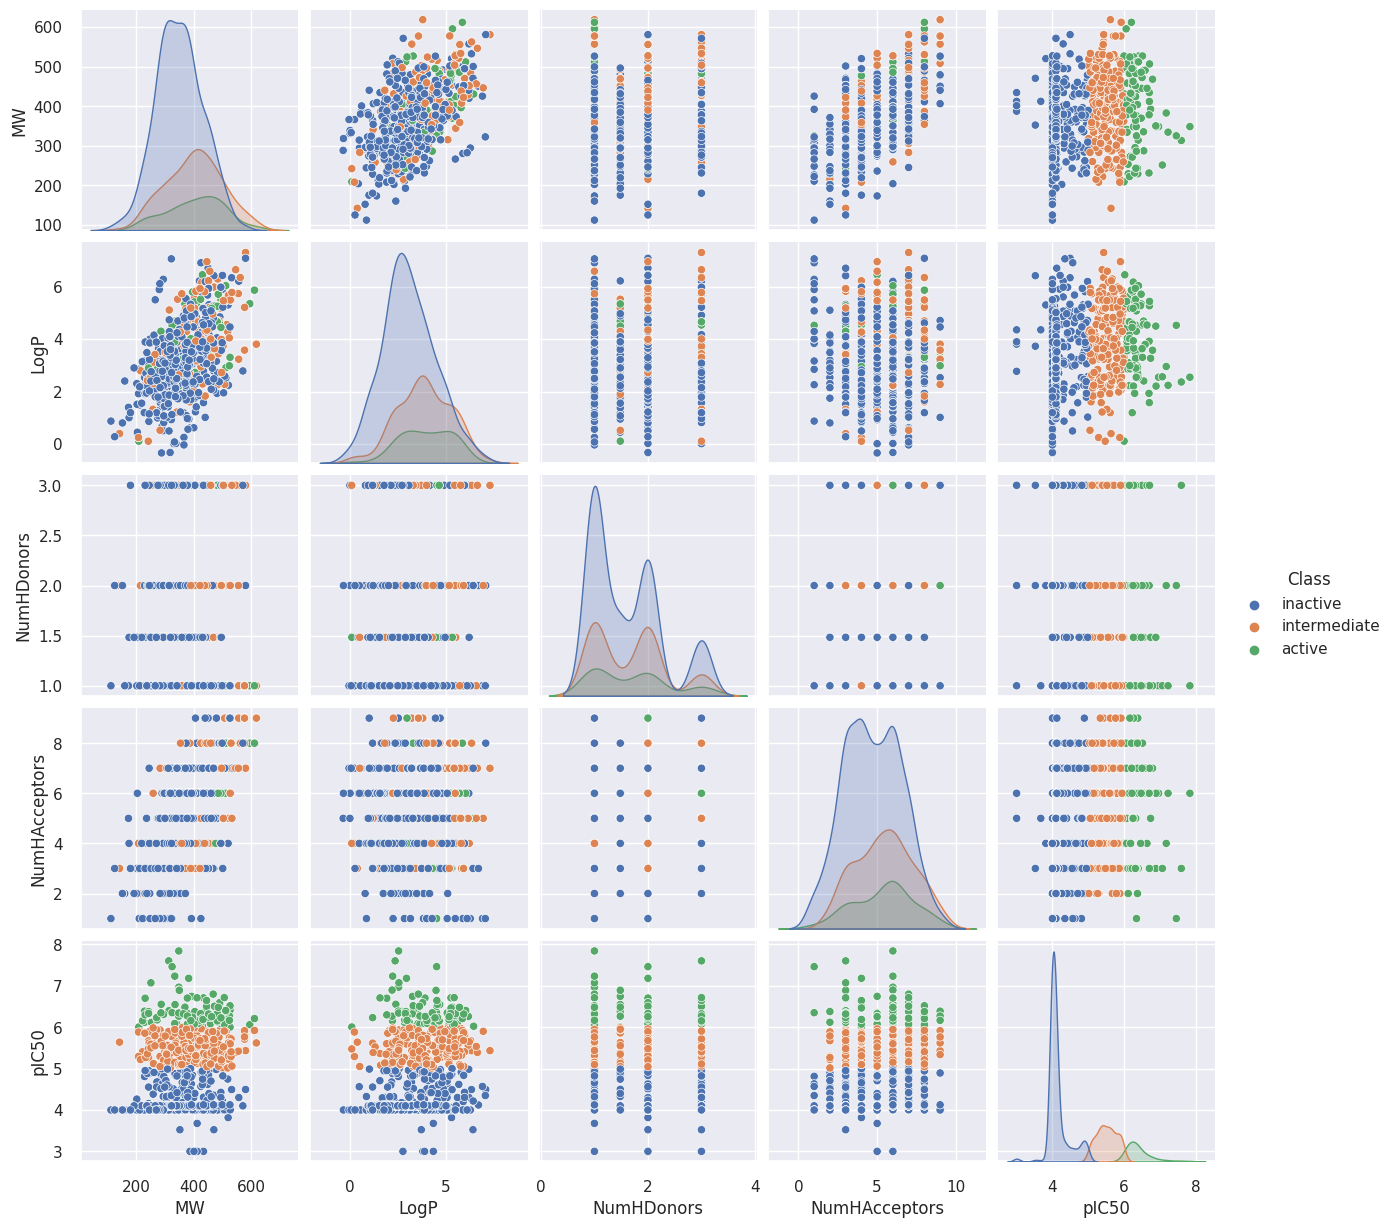

In [ ]:
import seaborn as sns
sns.pairplot(data = df2_out, hue = 'Class');

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(y):
    le = LabelEncoder()
    df2_out[y] = le.fit_transform(df2_out[y])

In [ ]:
label_list = ["Class"]

for l in label_list:
    label_encoder(l)

In [ ]:
from sklearn.model_selection import train_test_split

x = df2_out.drop(["Class"],axis=1)
y = df2_out.Class

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

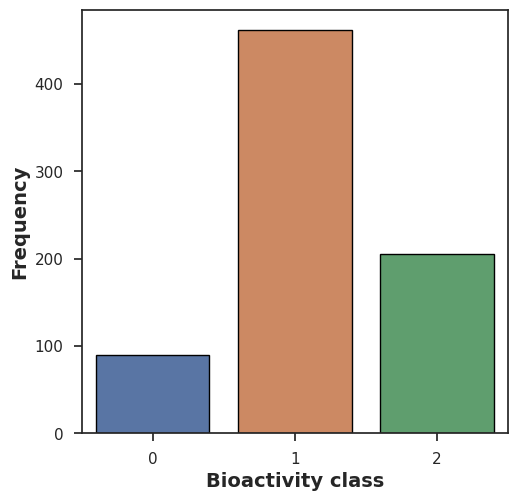

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='Class', data=df2_out, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

In [ ]:
df.Class.value_counts()

inactive        487
intermediate    215
active           99
Name: Class, dtype: int64

In [ ]:
df.columns

Index(['Class', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50'], dtype='object')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=100)
x = df2_out[['MW','LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']]
y = df2_out['Class']

In [ ]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (606, 5)
x_test shape: (152, 5)
y_train shape: (606, 1)
y_test shape: (152, 1)


In [ ]:
result_dict_train = {}
result_dict_test = {}

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)

In [ ]:
lrc = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lrc.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lrc.score(x_test, y_test)

0.9407894736842105

In [ ]:
y_train_predict_lrc = lrc.predict(x_train)

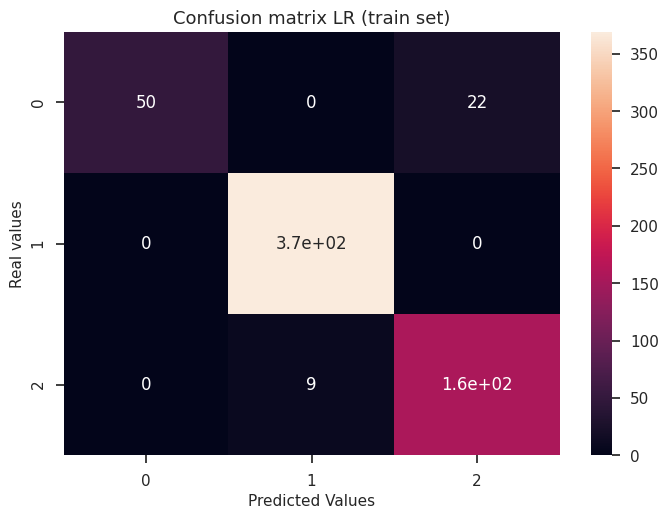

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_predict_lrc), 
            annot = True)
plt.title('Confusion matrix LR (train set)', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_train, y_train_predict_lrc))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        72
           1       0.98      1.00      0.99       369
           2       0.88      0.95      0.91       165

    accuracy                           0.95       606
   macro avg       0.95      0.88      0.91       606
weighted avg       0.95      0.95      0.95       606



In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 5, 
                             n_repeats = 10, 
                             random_state = 10)

In [ ]:
accuracies_lrc = cross_val_score(lrc, X = x_train, y = y_train_predict_lrc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)

In [ ]:
print(f"Accuracy:\nmean: {accuracies_lrc.mean():.3f}, std: {accuracies_lrc.std():.3f}")

Accuracy:
mean: 0.918, std: 0.014


In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, x_train, y_train, cv=5)
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc.score(x_test, y_test)

0.9473684210526315

In [ ]:
y_train_predict_svc = svc.predict(x_train)

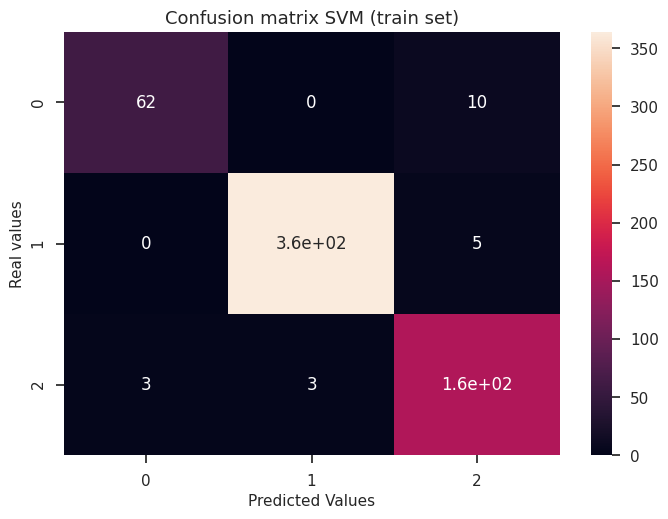

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_predict_svc), 
            annot = True)
plt.title('Confusion matrix SVM (train set)', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_train, y_train_predict_svc))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91        72
           1       0.99      0.99      0.99       369
           2       0.91      0.96      0.94       165

    accuracy                           0.97       606
   macro avg       0.95      0.94      0.94       606
weighted avg       0.97      0.97      0.97       606



In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 5, 
                             n_repeats = 10, 
                             random_state = 10)

In [ ]:
accuracies_svc = cross_val_score(svc, X= x_train, y = y_train_predict_svc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)

In [ ]:
print(f"Accuracy:\nmean: {accuracies_svc.mean():.3f}, std: {accuracies_svc.std():.3f}")

Accuracy:
mean: 0.982, std: 0.012


In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
tree.fit(x_train, y_train)
accuracies = cross_val_score(tree, x_train, y_train, cv=5)
tree.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [ ]:
tree.score(x_test, y_test)

1.0

In [ ]:
y_train_predict_tree = tree.predict(x_train)

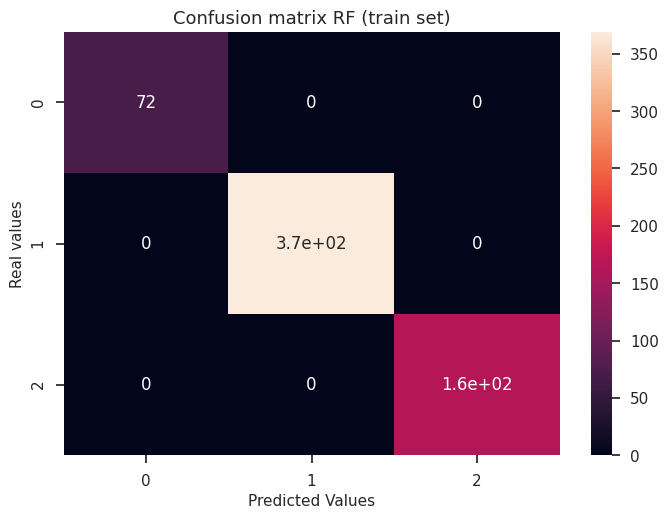

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_predict_tree), 
            annot = True)
plt.title('Confusion matrix RF (train set)', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_train, y_train_predict_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00       369
           2       1.00      1.00      1.00       165

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606



In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 5, 
                             n_repeats = 10, 
                             random_state = 10)

In [ ]:
accuracies_tree = cross_val_score(tree, X= x_train, y = y_train_predict_tree, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)

In [ ]:
print(f"Accuracy:\nmean: {accuracies_tree.mean():.3f}, std: {accuracies_tree.std():.3f}")

Accuracy:
mean: 0.996, std: 0.005


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
accuracies = cross_val_score(knn, x_train, y_train, cv=5)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
knn.score(x_test, y_test)

0.8881578947368421

In [ ]:
y_train_predict_knn = knn.predict(x_train)

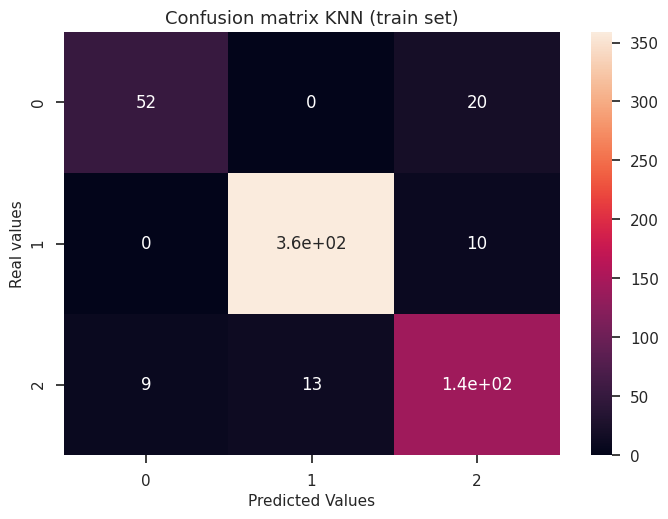

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_predict_knn), 
            annot = True)
plt.title('Confusion matrix KNN (train set)', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_train, y_train_predict_knn))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        72
           1       0.97      0.97      0.97       369
           2       0.83      0.87      0.85       165

    accuracy                           0.91       606
   macro avg       0.88      0.85      0.87       606
weighted avg       0.91      0.91      0.91       606



In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 10, 
                             n_repeats = 10, 
                             random_state = 10)

In [ ]:
accuracies_knn = cross_val_score(knn, X= x_train, y = y_train_predict_knn, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)

In [ ]:
print(f"Accuracy:\nmean: {accuracies_knn.mean():.3f}, std: {accuracies_knn.std():.3f}")

Accuracy:
mean: 0.931, std: 0.030


In [ ]:
rfc = ensemble.RandomForestClassifier(random_state = 1)
rfc.fit(x_train ,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
rfc.score(x_test, y_test)

0.993421052631579

In [ ]:
y_train_predict_rfc = rfc.predict(x_train)

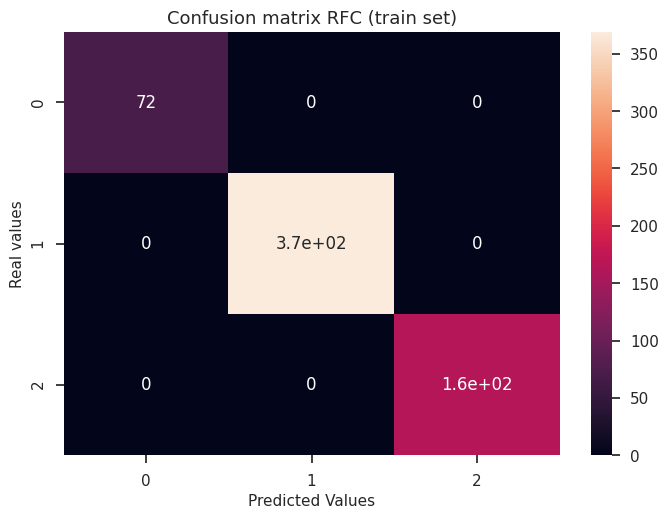

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_train_predict_rfc), 
            annot = True)
plt.title('Confusion matrix RFC (train set)', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 5, 
                             n_repeats = 10, 
                             random_state = 10)

In [ ]:
accuracies_rfc = cross_val_score(rfc, X= x_train, y = y_train_predict_rfc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)

In [ ]:
print(f"Accuracy:\nmean: {accuracies_rfc.mean():.3f}, std: {accuracies_rfc.std():.3f}")

Accuracy:
mean: 0.995, std: 0.005


In [ ]:
print(f"Logistic Regression accuracy:\nmean: {accuracies_lrc.mean():.3f}, std: {accuracies_lrc.std():.3f}")
print(f"KNN accuracy:\nmean: {accuracies_knn.mean():.3f}, std: {accuracies_knn.std():.3f}")
print(f"SVC accuracy:\nmean: {accuracies_svc.mean():.3f}, std: {accuracies_svc.std():.3f}")
print(f"Random forest accuracy:\nmean: {accuracies_rfc.mean():.3f}, std: {accuracies_rfc.std():.3f}")
print(f"Decision tree accuracy:\nmean: {accuracies_tree.mean():.3f}, std: {accuracies_tree.std():.3f}")


Logistic Regression accuracy:
mean: 0.918, std: 0.014
KNN accuracy:
mean: 0.931, std: 0.030
SVC accuracy:
mean: 0.982, std: 0.012
Random forest accuracy:
mean: 0.995, std: 0.005
Decision tree accuracy:
mean: 0.996, std: 0.005


In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

Random Oversampling

In [ ]:
ros = RandomOverSampler()

In [ ]:
x_ros, y_ros = ros.fit_resample(x, y)

In [ ]:
print(Counter(y_ros))

Counter({1: 462, 2: 462, 0: 462})


In [ ]:
counter = Counter(y_ros)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=462 (60.950%)
Class=2, n=462 (60.950%)
Class=0, n=462 (60.950%)


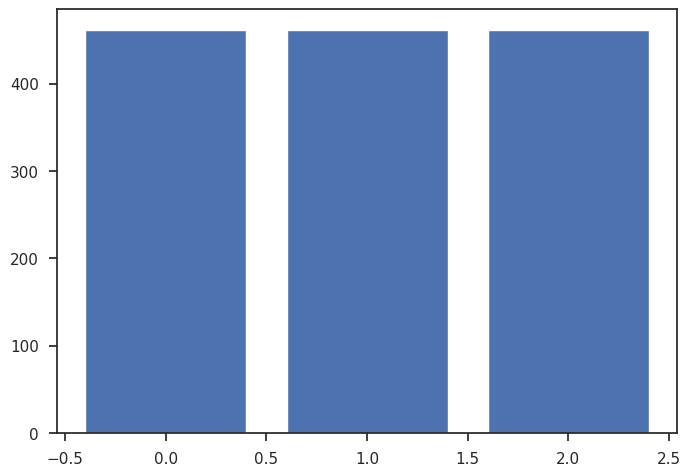

In [ ]:
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
lrc = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
accuracies = cross_val_score(lrc, x_ros, y_ros, cv=5)
lrc.fit(x_ros, y_ros)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lrc.score(x_ros, y_ros)

0.8795093795093795

In [ ]:
y_ros_predict_lrc = lrc.predict(x_ros)

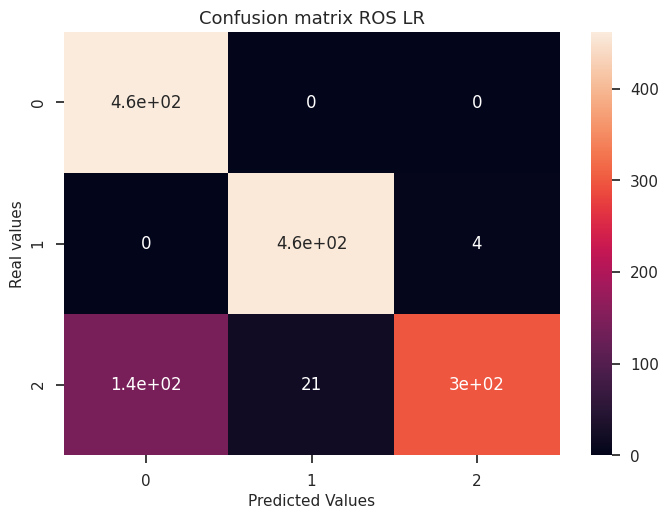

In [ ]:
sns.heatmap(confusion_matrix(y_ros, y_ros_predict_lrc), 
            annot = True)
plt.title('Confusion matrix ROS LR', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_ros, y_ros_predict_lrc))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87       462
           1       0.96      0.99      0.97       462
           2       0.99      0.65      0.78       462

    accuracy                           0.88      1386
   macro avg       0.90      0.88      0.87      1386
weighted avg       0.90      0.88      0.87      1386



In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 5, 
                             n_repeats = 10, 
                             random_state = 10)

In [ ]:
accuracies_lrc_ros = cross_val_score(lrc, X= x_ros, y = y_ros_predict_lrc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)

In [ ]:
print(f"LR Accuracy:\nmean: {accuracies_lrc.mean():.3f}, std: {accuracies_lrc.std():.3f}")
print(f"LR+ROS Accuracy:\nmean: {accuracies_lrc_ros.mean():.3f}, std: {accuracies_lrc_ros.std():.3f}")

LR Accuracy:
mean: 0.918, std: 0.014
LR+ROS Accuracy:
mean: 0.825, std: 0.012


In [ ]:
accuracies = cross_val_score(svc, x_ros, y_ros, cv=5)
svc.fit(x_ros,y_ros)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
svc.score(x_ros, y_ros)

0.45165945165945165

In [ ]:
print(Counter(y_ros))

Counter({1: 462, 2: 462, 0: 462})


In [ ]:
y_ros_predict_svc = svc.predict(x_ros)

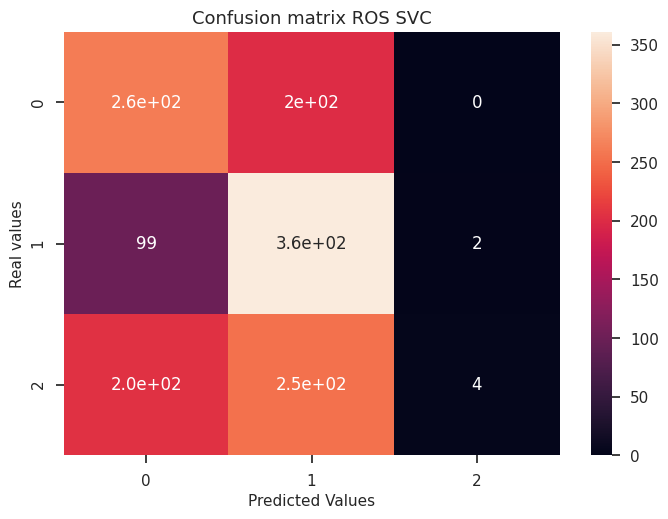

In [ ]:
sns.heatmap(confusion_matrix(y_ros, y_ros_predict_svc), 
            annot = True)
plt.title('Confusion matrix ROS SVC', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_ros, y_ros_predict_svc))

              precision    recall  f1-score   support

           0       0.46      0.56      0.51       462
           1       0.44      0.78      0.57       462
           2       0.67      0.01      0.02       462

    accuracy                           0.45      1386
   macro avg       0.52      0.45      0.36      1386
weighted avg       0.52      0.45      0.36      1386



In [ ]:
accuracies_svc_ros = cross_val_score(svc, X= x_ros, y = y_ros_predict_svc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)

In [ ]:
print(f"SVC Accuracy:\nmean: {accuracies_svc.mean():.3f}, std: {accuracies_svc.std():.3f}")
print(f"SVC+ROS Accuracy:\nmean: {accuracies_svc_ros.mean():.3f}, std: {accuracies_svc_ros.std():.3f}")

SVC Accuracy:
mean: 0.982, std: 0.012
SVC+ROS Accuracy:
mean: 0.986, std: 0.009


In [ ]:
accuracies = cross_val_score(knn, x_ros, y_ros, cv=5)
knn.fit(x_ros,y_ros)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
knn.score(x_ros, y_ros)

0.7705627705627706

In [ ]:
y_ros_predict_knn = knn.predict(x_ros)

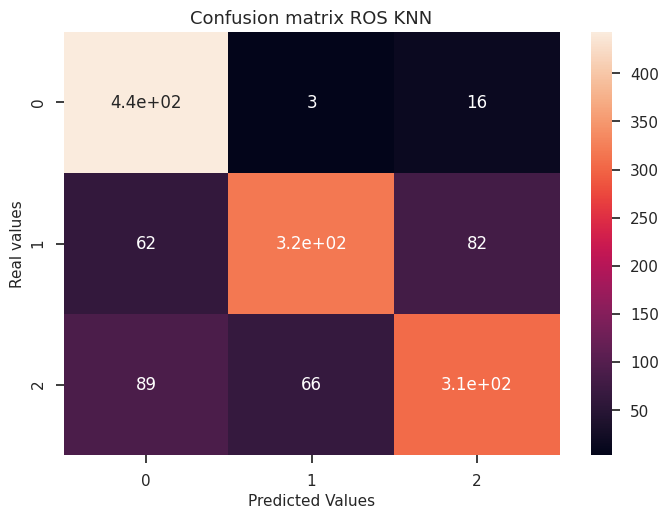

In [ ]:
sns.heatmap(confusion_matrix(y_ros, y_ros_predict_knn), 
            annot = True)
plt.title('Confusion matrix ROS KNN', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_ros, y_ros_predict_knn))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84       462
           1       0.82      0.69      0.75       462
           2       0.76      0.66      0.71       462

    accuracy                           0.77      1386
   macro avg       0.78      0.77      0.77      1386
weighted avg       0.78      0.77      0.77      1386



In [ ]:
accuracies_knn_ros = cross_val_score(knn, X= x_ros, y = y_ros_predict_knn, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)

In [ ]:
print(f"KNN Accuracy:\nmean: {accuracies_knn.mean():.3f}, std: {accuracies_knn.std():.3f}")
print(f"KNN+ROS Accuracy:\nmean: {accuracies_knn_ros.mean():.3f}, std: {accuracies_knn_ros.std():.3f}")

KNN Accuracy:
mean: 0.931, std: 0.030
KNN+ROS Accuracy:
mean: 0.834, std: 0.021


In [ ]:
rfc = ensemble.RandomForestClassifier(random_state = 1)
rfc.fit(x_ros ,y_ros)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
rfc.score(x_ros, y_ros)

1.0

In [ ]:
y_ros_predict_rfc = rfc.predict(x_ros)

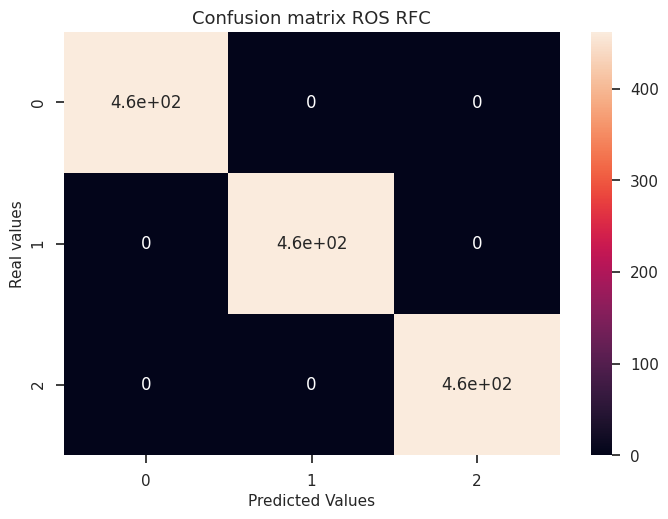

In [ ]:
sns.heatmap(confusion_matrix(y_ros, y_ros_predict_rfc), 
            annot = True)
plt.title('Confusion matrix ROS RFC', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_ros, y_ros_predict_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       1.00      1.00      1.00       462
           2       1.00      1.00      1.00       462

    accuracy                           1.00      1386
   macro avg       1.00      1.00      1.00      1386
weighted avg       1.00      1.00      1.00      1386



In [ ]:
accuracies_rfc_ros = cross_val_score(rfc, X= x_ros, y = y_ros_predict_rfc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)

In [ ]:
print(f"RFC Accuracy:\nmean: {accuracies_rfc.mean():.3f}, std: {accuracies_rfc.std():.3f}")
print(f"RFC+ROS Accuracy:\nmean: {accuracies_rfc_ros.mean():.3f}, std: {accuracies_rfc_ros.std():.3f}")

RFC Accuracy:
mean: 0.995, std: 0.005
RFC+ROS Accuracy:
mean: 1.000, std: 0.001


In [ ]:
accuracies = cross_val_score(tree, x_ros, y_ros, cv=5)
tree.fit(x_ros,y_ros)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

In [ ]:
tree.score(x_ros, y_ros)

1.0

In [ ]:
y_ros_predict_tree = tree.predict(x_ros)

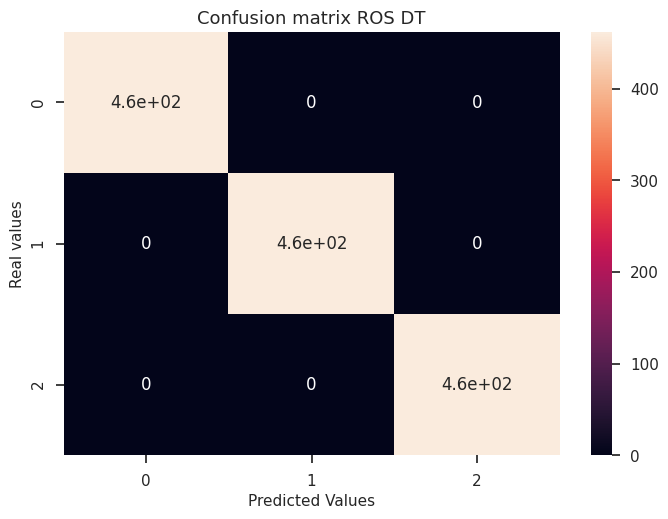

In [ ]:
sns.heatmap(confusion_matrix(y_ros, y_ros_predict_tree), 
            annot = True)
plt.title('Confusion matrix ROS DT', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_ros, y_ros_predict_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       1.00      1.00      1.00       462
           2       1.00      1.00      1.00       462

    accuracy                           1.00      1386
   macro avg       1.00      1.00      1.00      1386
weighted avg       1.00      1.00      1.00      1386



In [ ]:
accuracies_tree_ros = cross_val_score(tree, X= x_ros, y = y_ros_predict_tree, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)

In [ ]:
print(f"DT Accuracy:\nmean: {accuracies_tree.mean():.3f}, std: {accuracies_tree.std():.3f}")
print(f"DT+ROS Accuracy:\nmean: {accuracies_tree_ros.mean():.3f}, std: {accuracies_tree_ros.std():.3f}")

DT Accuracy:
mean: 0.996, std: 0.005
DT+ROS Accuracy:
mean: 1.000, std: 0.001


In [ ]:
print(f"LR Accuracy:\nmean: {accuracies_lrc.mean():.3f}, std: {accuracies_lrc.std():.3f}")
print(f"LR+ROS Accuracy:\nmean: {accuracies_lrc_ros.mean():.3f}, std: {accuracies_lrc_ros.std():.3f}")
print(f"KNN Accuracy:\nmean: {accuracies_knn.mean():.3f}, std: {accuracies_knn.std():.3f}")
print(f"KNN+ROS Accuracy:\nmean: {accuracies_knn_ros.mean():.3f}, std: {accuracies_knn_ros.std():.3f}")
print(f"SVC Accuracy:\nmean: {accuracies_svc.mean():.3f}, std: {accuracies_svc.std():.3f}")
print(f"SVC+ROS Accuracy:\nmean: {accuracies_svc_ros.mean():.3f}, std: {accuracies_svc_ros.std():.3f}")
print(f"RFC Accuracy:\nmean: {accuracies_rfc.mean():.3f}, std: {accuracies_rfc.std():.3f}")
print(f"RFC+ROS Accuracy:\nmean: {accuracies_rfc_ros.mean():.3f}, std: {accuracies_rfc_ros.std():.3f}")
print(f"DT Accuracy:\nmean: {accuracies_tree.mean():.3f}, std: {accuracies_tree.std():.3f}")
print(f"DT+ROS Accuracy:\nmean: {accuracies_tree_ros.mean():.3f}, std: {accuracies_tree_ros.std():.3f}")

LR Accuracy:
mean: 0.918, std: 0.014
LR+ROS Accuracy:
mean: 0.825, std: 0.012
KNN Accuracy:
mean: 0.931, std: 0.030
KNN+ROS Accuracy:
mean: 0.834, std: 0.021
SVC Accuracy:
mean: 0.982, std: 0.012
SVC+ROS Accuracy:
mean: 0.986, std: 0.009
RFC Accuracy:
mean: 0.995, std: 0.005
RFC+ROS Accuracy:
mean: 1.000, std: 0.001
DT Accuracy:
mean: 0.996, std: 0.005
DT+ROS Accuracy:
mean: 1.000, std: 0.001


Random undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler() 

In [ ]:
x_rus, y_rus = rus.fit_resample(x, y)
print(Counter(y_rus))

Counter({0: 90, 1: 90, 2: 90})


In [ ]:
counter = Counter(y_rus)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=90 (11.873%)
Class=1, n=90 (11.873%)
Class=2, n=90 (11.873%)


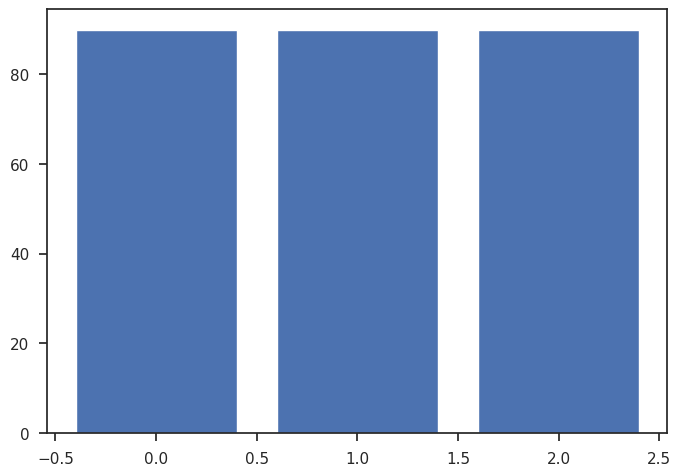

In [ ]:
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
accuracies = cross_val_score(lrc, x_rus, y_rus, cv=5)
lrc.fit(x_rus, y_rus)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

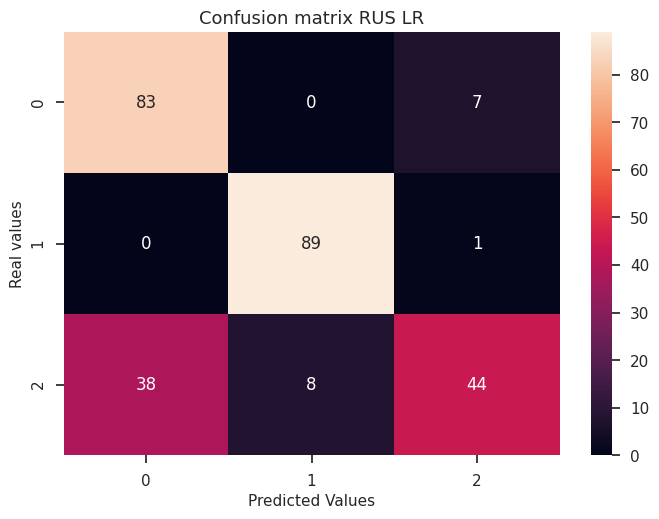

In [ ]:
y_rus_predict_lrc = lrc.predict(x_rus)
sns.heatmap(confusion_matrix(y_rus, y_rus_predict_lrc), 
            annot = True)
plt.title('Confusion matrix RUS LR', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_rus, y_rus_predict_lrc))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79        90
           1       0.92      0.99      0.95        90
           2       0.85      0.49      0.62        90

    accuracy                           0.80       270
   macro avg       0.82      0.80      0.79       270
weighted avg       0.82      0.80      0.79       270



In [ ]:
accuracies_lrc_rus = cross_val_score(lrc, X= x_rus, y = y_rus_predict_lrc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"LR Accuracy:\nmean: {accuracies_lrc.mean():.3f}, std: {accuracies_lrc.std():.3f}")
print(f"LR+RUS Accuracy:\nmean: {accuracies_lrc_rus.mean():.3f}, std: {accuracies_lrc_rus.std():.3f}")

LR Accuracy:
mean: 0.918, std: 0.014
LR+RUS Accuracy:
mean: 0.820, std: 0.043


In [ ]:
accuracies = cross_val_score(svc, x_rus, y_rus, cv=5)
svc.fit(x_rus, y_rus)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

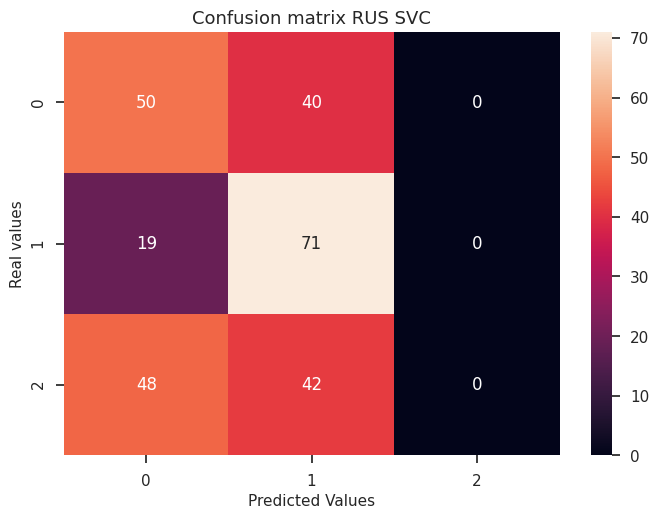

In [ ]:
y_rus_predict_svc = svc.predict(x_rus)
sns.heatmap(confusion_matrix(y_rus, y_rus_predict_svc), 
            annot = True)
plt.title('Confusion matrix RUS SVC', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_rus, y_rus_predict_svc))

              precision    recall  f1-score   support

           0       0.43      0.56      0.48        90
           1       0.46      0.79      0.58        90
           2       0.00      0.00      0.00        90

    accuracy                           0.45       270
   macro avg       0.30      0.45      0.36       270
weighted avg       0.30      0.45      0.36       270



In [ ]:
accuracies_svc_rus = cross_val_score(svc, X= x_rus, y = y_rus_predict_svc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"SVC Accuracy:\nmean: {accuracies_svc.mean():.3f}, std: {accuracies_svc.std():.3f}")
print(f"SVC+RUS Accuracy:\nmean: {accuracies_svc_rus.mean():.3f}, std: {accuracies_svc_rus.std():.3f}")

SVC Accuracy:
mean: 0.982, std: 0.012
SVC+RUS Accuracy:
mean: 0.987, std: 0.018


In [ ]:
accuracies = cross_val_score(knn, x_rus, y_rus, cv=5)
knn.fit(x_rus, y_rus)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

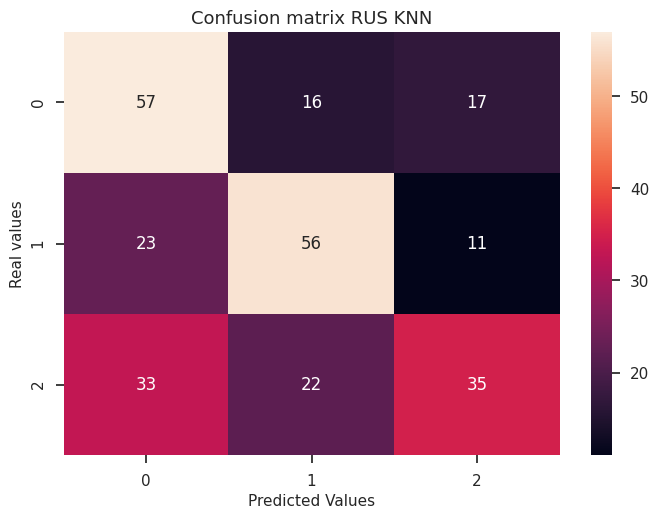

In [ ]:
y_rus_predict_knn = knn.predict(x_rus)
sns.heatmap(confusion_matrix(y_rus, y_rus_predict_knn), 
            annot = True)
plt.title('Confusion matrix RUS KNN', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_rus, y_rus_predict_knn))

              precision    recall  f1-score   support

           0       0.50      0.63      0.56        90
           1       0.60      0.62      0.61        90
           2       0.56      0.39      0.46        90

    accuracy                           0.55       270
   macro avg       0.55      0.55      0.54       270
weighted avg       0.55      0.55      0.54       270



In [ ]:
accuracies_knn_rus = cross_val_score(knn, X= x_rus, y = y_rus_predict_knn, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"KNN Accuracy:\nmean: {accuracies_knn.mean():.3f}, std: {accuracies_knn.std():.3f}")
print(f"KNN+RUS Accuracy:\nmean: {accuracies_knn_rus.mean():.3f}, std: {accuracies_knn_rus.std():.3f}")

KNN Accuracy:
mean: 0.931, std: 0.030
KNN+RUS Accuracy:
mean: 0.787, std: 0.044


In [ ]:
accuracies = cross_val_score(rfc, x_rus, y_rus, cv=5)
rfc.fit(x_rus, y_rus)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

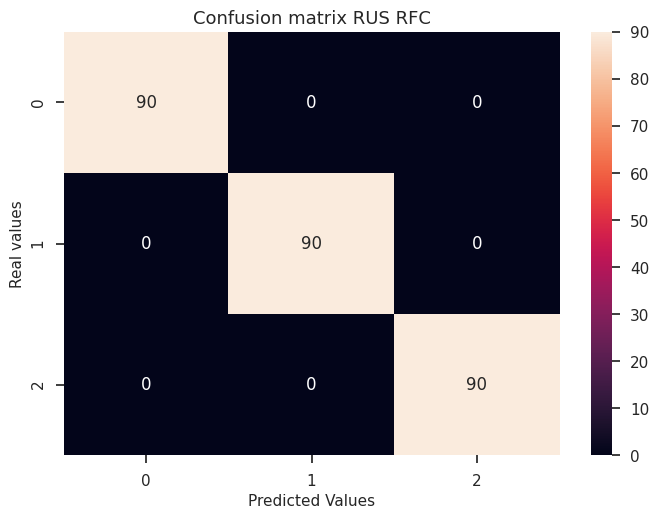

In [ ]:
y_rus_predict_rfc = rfc.predict(x_rus)
sns.heatmap(confusion_matrix(y_rus, y_rus_predict_rfc), 
            annot = True)
plt.title('Confusion matrix RUS RFC', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_rus, y_rus_predict_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        90

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [ ]:
accuracies_rfc_rus = cross_val_score(rfc, X= x_rus, y = y_rus_predict_rfc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"RFC Accuracy:\nmean: {accuracies_rfc.mean():.3f}, std: {accuracies_rfc.std():.3f}")
print(f"RFC+RUS Accuracy:\nmean: {accuracies_rfc_rus.mean():.3f}, std: {accuracies_rfc_rus.std():.3f}")

RFC Accuracy:
mean: 0.995, std: 0.005
RFC+RUS Accuracy:
mean: 0.988, std: 0.015


In [ ]:
accuracies = cross_val_score(tree, x_rus, y_rus, cv=5)
tree.fit(x_rus, y_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

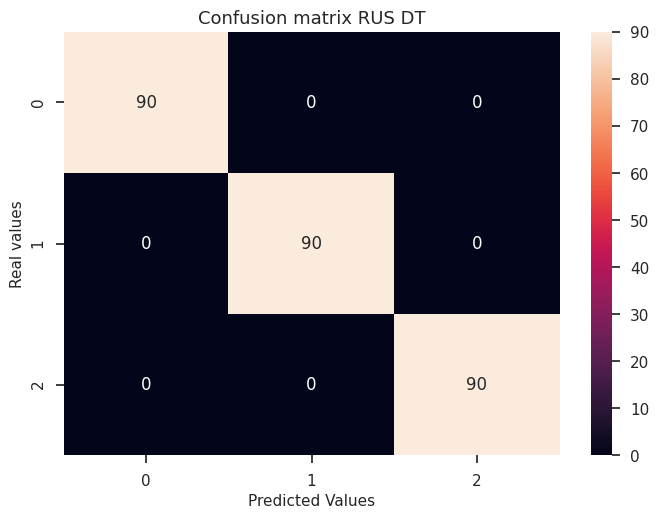

In [ ]:
y_rus_predict_tree = tree.predict(x_rus)
sns.heatmap(confusion_matrix(y_rus, y_rus_predict_tree), 
            annot = True)
plt.title('Confusion matrix RUS DT', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_rus, y_rus_predict_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        90

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



In [ ]:
accuracies_tree_rus = cross_val_score(tree, X= x_rus, y = y_rus_predict_tree, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"DT Accuracy:\nmean: {accuracies_tree.mean():.3f}, std: {accuracies_tree.std():.3f}")
print(f"DT+RUS Accuracy:\nmean: {accuracies_tree_rus.mean():.3f}, std: {accuracies_tree_rus.std():.3f}")

DT Accuracy:
mean: 0.996, std: 0.005
DT+RUS Accuracy:
mean: 0.994, std: 0.011


In [ ]:
print(f"LR Accuracy:\nmean: {accuracies_lrc.mean():.3f}, std: {accuracies_lrc.std():.3f}")
print(f"LR+RUS Accuracy:\nmean: {accuracies_lrc_rus.mean():.3f}, std: {accuracies_lrc_rus.std():.3f}")
print(f"SVC Accuracy:\nmean: {accuracies_svc.mean():.3f}, std: {accuracies_svc.std():.3f}")
print(f"SVC+RUS Accuracy:\nmean: {accuracies_svc_rus.mean():.3f}, std: {accuracies_svc_rus.std():.3f}")
print(f"KNN Accuracy:\nmean: {accuracies_knn.mean():.3f}, std: {accuracies_knn.std():.3f}")
print(f"KNN+RUS Accuracy:\nmean: {accuracies_knn_rus.mean():.3f}, std: {accuracies_knn_rus.std():.3f}")
print(f"RFC Accuracy:\nmean: {accuracies_rfc.mean():.3f}, std: {accuracies_rfc.std():.3f}")
print(f"RFC+RUS Accuracy:\nmean: {accuracies_rfc_rus.mean():.3f}, std: {accuracies_rfc_rus.std():.3f}")
print(f"DT Accuracy:\nmean: {accuracies_tree.mean():.3f}, std: {accuracies_tree.std():.3f}")
print(f"DT+RUS Accuracy:\nmean: {accuracies_tree_rus.mean():.3f}, std: {accuracies_tree_rus.std():.3f}")

LR Accuracy:
mean: 0.918, std: 0.014
LR+RUS Accuracy:
mean: 0.820, std: 0.043
SVC Accuracy:
mean: 0.982, std: 0.012
SVC+RUS Accuracy:
mean: 0.987, std: 0.018
KNN Accuracy:
mean: 0.931, std: 0.030
KNN+RUS Accuracy:
mean: 0.787, std: 0.044
RFC Accuracy:
mean: 0.995, std: 0.005
RFC+RUS Accuracy:
mean: 0.988, std: 0.015
DT Accuracy:
mean: 0.996, std: 0.005
DT+RUS Accuracy:
mean: 0.994, std: 0.011


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE()
x_sm, y_sm = sm.fit_resample(x, y)
Counter(y)

Counter({0: 90, 1: 462, 2: 206})

In [ ]:
counter = Counter(y_sm)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=462 (60.950%)
Class=2, n=462 (60.950%)
Class=0, n=462 (60.950%)


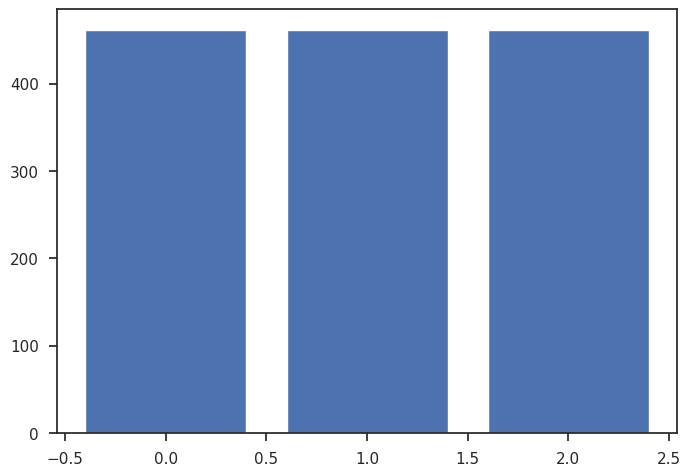

In [ ]:
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
accuracies = cross_val_score(lrc, x_sm, y_sm, cv=5)
lrc.fit(x_sm, y_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

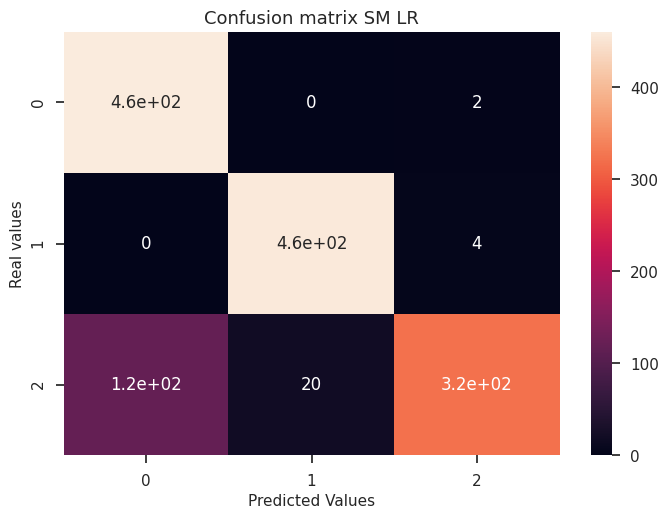

In [ ]:
y_sm_predict_lrc = lrc.predict(x_sm)
sns.heatmap(confusion_matrix(y_sm, y_sm_predict_lrc), 
            annot = True)
plt.title('Confusion matrix SM LR', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_sm, y_sm_predict_lrc))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       462
           1       0.96      0.99      0.97       462
           2       0.98      0.70      0.82       462

    accuracy                           0.89      1386
   macro avg       0.91      0.89      0.89      1386
weighted avg       0.91      0.89      0.89      1386



In [ ]:
accuracies_lrc_sm = cross_val_score(tree, X= x_sm, y = y_sm_predict_lrc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"LR Accuracy:\nmean: {accuracies_lrc.mean():.3f}, std: {accuracies_lrc.std():.3f}")
print(f"LR+SM Accuracy:\nmean: {accuracies_lrc_sm.mean():.3f}, std: {accuracies_lrc_sm.std():.3f}")

LR Accuracy:
mean: 0.918, std: 0.014
LR+SM Accuracy:
mean: 0.953, std: 0.011


In [ ]:
accuracies = cross_val_score(svc, x_sm, y_sm, cv=5)
svc.fit(x_sm, y_sm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

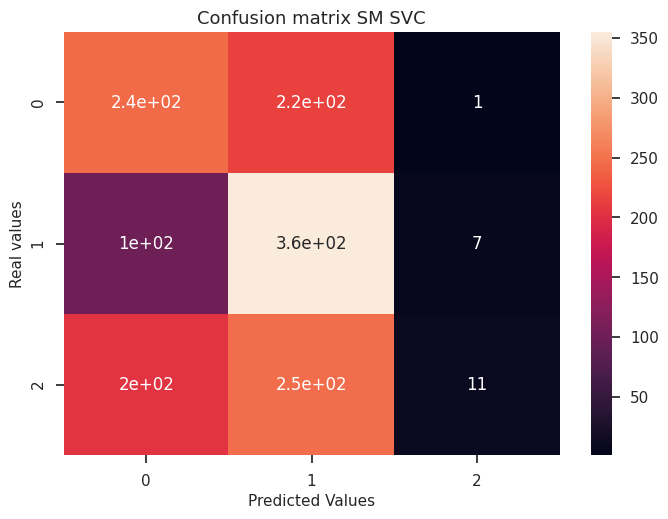

In [ ]:
y_sm_predict_svc = svc.predict(x_sm)
sns.heatmap(confusion_matrix(y_sm, y_sm_predict_svc), 
            annot = True)
plt.title('Confusion matrix SM SVC', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_sm, y_sm_predict_svc))

              precision    recall  f1-score   support

           0       0.45      0.53      0.48       462
           1       0.43      0.77      0.55       462
           2       0.58      0.02      0.05       462

    accuracy                           0.44      1386
   macro avg       0.49      0.44      0.36      1386
weighted avg       0.49      0.44      0.36      1386



In [ ]:
accuracies_svc_sm = cross_val_score(svc, X= x_sm, y = y_sm_predict_svc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"SVC Accuracy:\nmean: {accuracies_svc.mean():.3f}, std: {accuracies_svc.std():.3f}")
print(f"SVC+SM Accuracy:\nmean: {accuracies_svc_sm.mean():.3f}, std: {accuracies_svc_sm.std():.3f}")


SVC Accuracy:
mean: 0.982, std: 0.012
SVC+SM Accuracy:
mean: 0.986, std: 0.002


In [ ]:
accuracies = cross_val_score(knn, x_sm, y_sm, cv=5)
knn.fit(x_sm, y_sm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

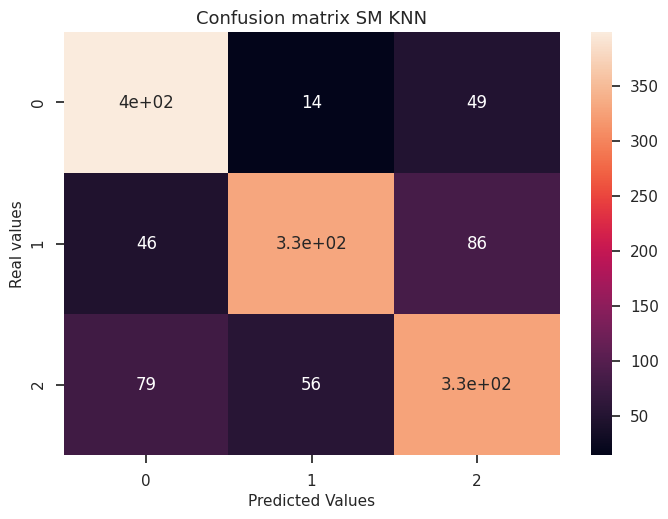

In [ ]:
y_sm_predict_knn = knn.predict(x_sm)
sns.heatmap(confusion_matrix(y_sm, y_sm_predict_knn), 
            annot = True)
plt.title('Confusion matrix SM KNN', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_sm, y_sm_predict_knn))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       462
           1       0.82      0.71      0.77       462
           2       0.71      0.71      0.71       462

    accuracy                           0.76      1386
   macro avg       0.76      0.76      0.76      1386
weighted avg       0.76      0.76      0.76      1386



In [ ]:
accuracies_knn_sm = cross_val_score(knn, X= x_sm, y = y_sm_predict_knn, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"KNN Accuracy:\nmean: {accuracies_knn.mean():.3f}, std: {accuracies_knn.std():.3f}")
print(f"KNN+SM Accuracy:\nmean: {accuracies_knn_sm.mean():.3f}, std: {accuracies_knn_sm.std():.3f}")



KNN Accuracy:
mean: 0.931, std: 0.030
KNN+SM Accuracy:
mean: 0.837, std: 0.023


In [ ]:
accuracies = cross_val_score(rfc, x_sm, y_sm, cv=5)
rfc.fit(x_sm, y_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

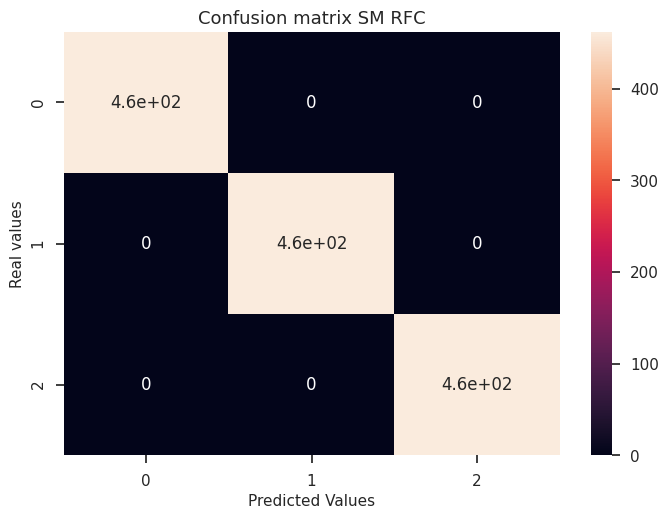

In [ ]:
y_sm_predict_rfc = rfc.predict(x_sm)
sns.heatmap(confusion_matrix(y_sm, y_sm_predict_rfc), 
            annot = True)
plt.title('Confusion matrix SM RFC', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_sm, y_sm_predict_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       1.00      1.00      1.00       462
           2       1.00      1.00      1.00       462

    accuracy                           1.00      1386
   macro avg       1.00      1.00      1.00      1386
weighted avg       1.00      1.00      1.00      1386



In [ ]:
accuracies_rfc_sm = cross_val_score(rfc, X= x_sm, y = y_sm_predict_rfc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"RFC Accuracy:\nmean: {accuracies_rfc.mean():.3f}, std: {accuracies_rfc.std():.3f}")
print(f"RFC+SM Accuracy:\nmean: {accuracies_rfc_sm.mean():.3f}, std: {accuracies_rfc_sm.std():.3f}")


RFC Accuracy:
mean: 0.995, std: 0.005
RFC+SM Accuracy:
mean: 0.998, std: 0.003


In [ ]:
accuracies = cross_val_score(tree, x_sm, y_sm, cv=5)
tree.fit(x_sm, y_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

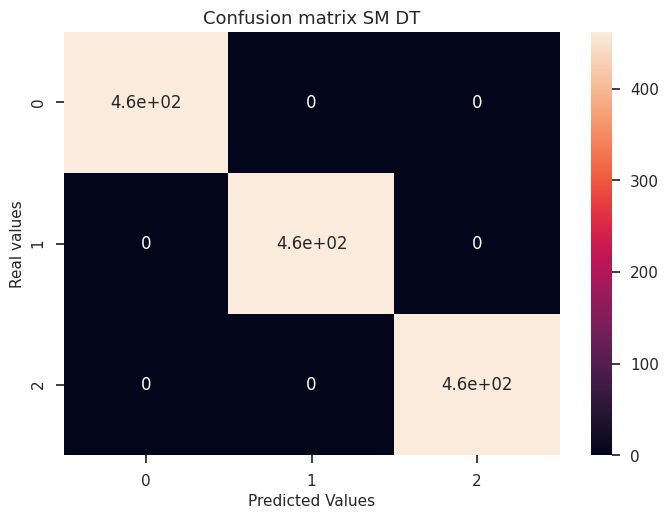

In [ ]:
y_sm_predict_tree = tree.predict(x_sm)
sns.heatmap(confusion_matrix(y_sm, y_sm_predict_tree), 
            annot = True)
plt.title('Confusion matrix SM DT', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_sm, y_sm_predict_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       462
           1       1.00      1.00      1.00       462
           2       1.00      1.00      1.00       462

    accuracy                           1.00      1386
   macro avg       1.00      1.00      1.00      1386
weighted avg       1.00      1.00      1.00      1386



In [ ]:
accuracies_tree_sm = cross_val_score(tree, X= x_sm, y = y_sm_predict_tree, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"DT Accuracy:\nmean: {accuracies_tree.mean():.3f}, std: {accuracies_tree.std():.3f}")
print(f"DT+SM Accuracy:\nmean: {accuracies_tree_sm.mean():.3f}, std: {accuracies_tree_sm.std():.3f}")


DT Accuracy:
mean: 0.996, std: 0.005
DT+SM Accuracy:
mean: 0.999, std: 0.002


In [ ]:
print(f"LR Accuracy:\nmean: {accuracies_lrc.mean():.3f}, std: {accuracies_lrc.std():.3f}")
print(f"LR+SM Accuracy:\nmean: {accuracies_lrc_sm.mean():.3f}, std: {accuracies_lrc_sm.std():.3f}")
print(f"SVC Accuracy:\nmean: {accuracies_svc.mean():.3f}, std: {accuracies_svc.std():.3f}")
print(f"SVC+SM Accuracy:\nmean: {accuracies_svc_sm.mean():.3f}, std: {accuracies_svc_sm.std():.3f}")
print(f"KNN Accuracy:\nmean: {accuracies_knn.mean():.3f}, std: {accuracies_knn.std():.3f}")
print(f"KNN+SM Accuracy:\nmean: {accuracies_knn_sm.mean():.3f}, std: {accuracies_knn_sm.std():.3f}")
print(f"RFC Accuracy:\nmean: {accuracies_rfc.mean():.3f}, std: {accuracies_rfc.std():.3f}")
print(f"RFC+SM Accuracy:\nmean: {accuracies_rfc_sm.mean():.3f}, std: {accuracies_rfc_sm.std():.3f}")
print(f"DT Accuracy:\nmean: {accuracies_tree.mean():.3f}, std: {accuracies_tree.std():.3f}")
print(f"DT+SM Accuracy:\nmean: {accuracies_tree_sm.mean():.3f}, std: {accuracies_tree_sm.std():.3f}")

LR Accuracy:
mean: 0.918, std: 0.014
LR+SM Accuracy:
mean: 0.953, std: 0.011
SVC Accuracy:
mean: 0.982, std: 0.012
SVC+SM Accuracy:
mean: 0.986, std: 0.002
KNN Accuracy:
mean: 0.931, std: 0.030
KNN+SM Accuracy:
mean: 0.837, std: 0.023
RFC Accuracy:
mean: 0.995, std: 0.005
RFC+SM Accuracy:
mean: 0.998, std: 0.003
DT Accuracy:
mean: 0.996, std: 0.005
DT+SM Accuracy:
mean: 0.999, std: 0.002


In [ ]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=130)
x_ada, y_ada = ada.fit_resample(x, y)
Counter(y)

Counter({0: 90, 1: 462, 2: 206})

In [ ]:
counter = Counter(y_ada)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=462 (60.950%)
Class=2, n=458 (60.422%)
Class=0, n=464 (61.214%)


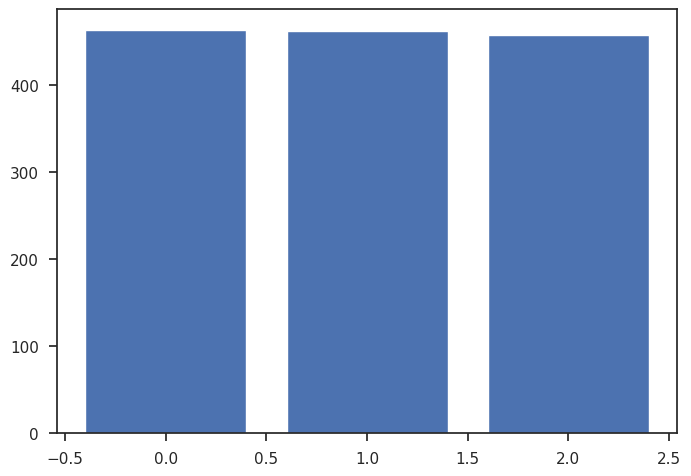

In [ ]:
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
accuracies = cross_val_score(lrc, x_ada, y_ada, cv=5)
lrc.fit(x_ada, y_ada)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

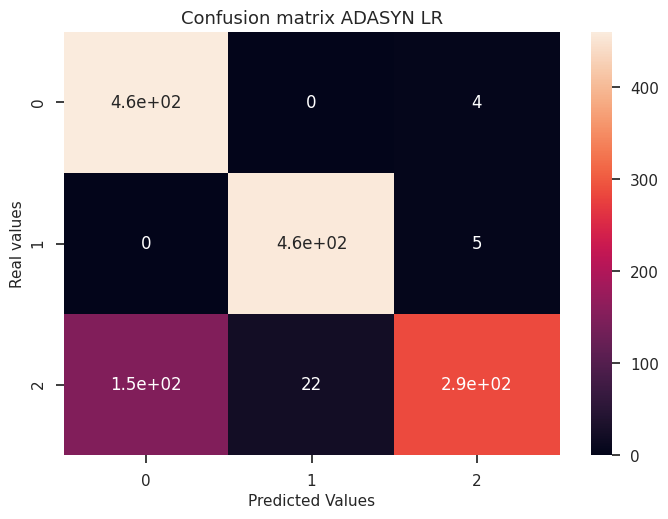

In [ ]:
y_ada_predict_lrc = lrc.predict(x_ada)
sns.heatmap(confusion_matrix(y_ada, y_ada_predict_lrc), 
            annot = True)
plt.title('Confusion matrix ADASYN LR', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_ada, y_ada_predict_lrc))

              precision    recall  f1-score   support

           0       0.75      0.99      0.86       464
           1       0.95      0.99      0.97       462
           2       0.97      0.62      0.76       458

    accuracy                           0.87      1384
   macro avg       0.89      0.87      0.86      1384
weighted avg       0.89      0.87      0.86      1384



In [ ]:
accuracies_lrc_ada = cross_val_score(lrc, X= x_ada, y = y_ada_predict_lrc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"DT Accuracy:\nmean: {accuracies_lrc.mean():.3f}, std: {accuracies_lrc.std():.3f}")
print(f"DT+ADASYN Accuracy:\nmean: {accuracies_lrc_ada.mean():.3f}, std: {accuracies_lrc_ada.std():.3f}")

DT Accuracy:
mean: 0.918, std: 0.014
DT+ADASYN Accuracy:
mean: 0.826, std: 0.012


In [ ]:
accuracies = cross_val_score(svc, x_ada, y_ada, cv=5)
svc.fit(x_ada, y_ada)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

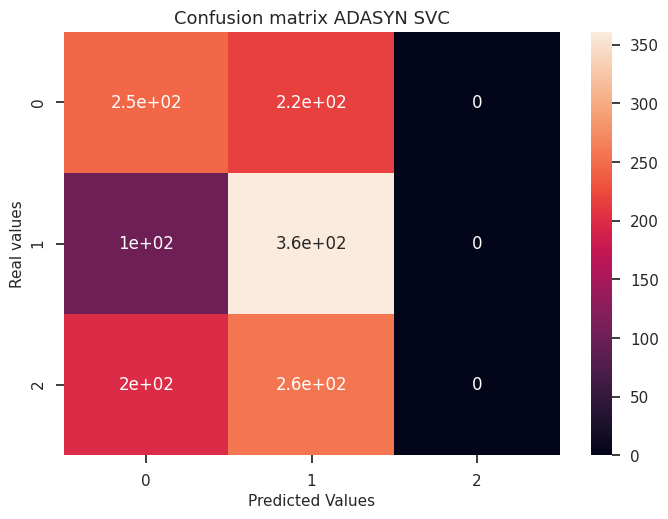

In [ ]:
y_ada_predict_svc = svc.predict(x_ada)
sns.heatmap(confusion_matrix(y_ada, y_ada_predict_svc), 
            annot = True)
plt.title('Confusion matrix ADASYN SVC', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_ada, y_ada_predict_svc))

              precision    recall  f1-score   support

           0       0.45      0.53      0.49       464
           1       0.43      0.78      0.56       462
           2       0.00      0.00      0.00       458

    accuracy                           0.44      1384
   macro avg       0.29      0.44      0.35      1384
weighted avg       0.29      0.44      0.35      1384



In [ ]:
accuracies_svc_ada = cross_val_score(svc, X= x_ada, y = y_ada_predict_svc,
                                     scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"SVC Accuracy:\nmean: {accuracies_svc.mean():.3f}, std: {accuracies_svc.std():.3f}")
print(f"SVC+ADASYN Accuracy:\nmean: {accuracies_svc_ada.mean():.3f}, std: {accuracies_svc_ada.std():.3f}")

SVC Accuracy:
mean: 0.982, std: 0.012
SVC+ADASYN Accuracy:
mean: 0.993, std: 0.005


In [ ]:
accuracies = cross_val_score(knn, x_ada, y_ada, cv=5)
knn.fit(x_ada, y_ada)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

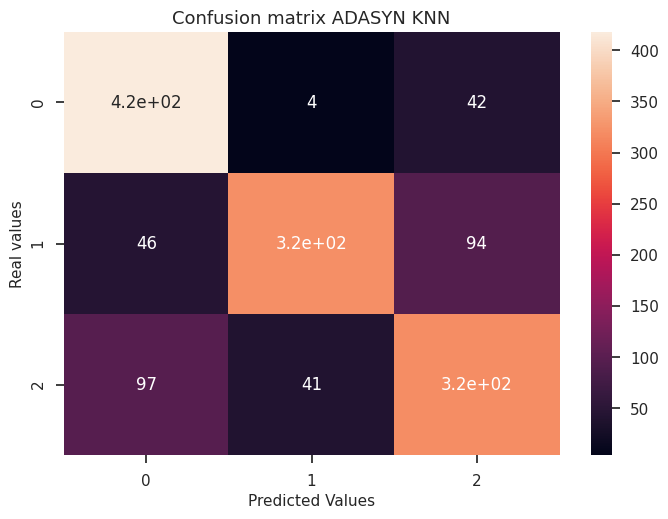

In [ ]:
y_ada_predict_knn = knn.predict(x_ada)
sns.heatmap(confusion_matrix(y_ada, y_ada_predict_knn), 
            annot = True)
plt.title('Confusion matrix ADASYN KNN', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_ada, y_ada_predict_knn))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       464
           1       0.88      0.70      0.78       462
           2       0.70      0.70      0.70       458

    accuracy                           0.77      1384
   macro avg       0.77      0.77      0.76      1384
weighted avg       0.77      0.77      0.76      1384



In [ ]:
accuracies_knn_ada = cross_val_score(knn, X= x_ada, y = y_ada_predict_knn, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"KNN Accuracy:\nmean: {accuracies_knn.mean():.3f}, std: {accuracies_knn.std():.3f}")
print(f"KNN+ADASYN Accuracy:\nmean: {accuracies_knn_ada.mean():.3f}, std: {accuracies_knn_ada.std():.3f}")


KNN Accuracy:
mean: 0.931, std: 0.030
KNN+ADASYN Accuracy:
mean: 0.811, std: 0.018


In [ ]:
accuracies = cross_val_score(knn, x_ada, y_ada, cv=5)
knn.fit(x_ada, y_ada)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

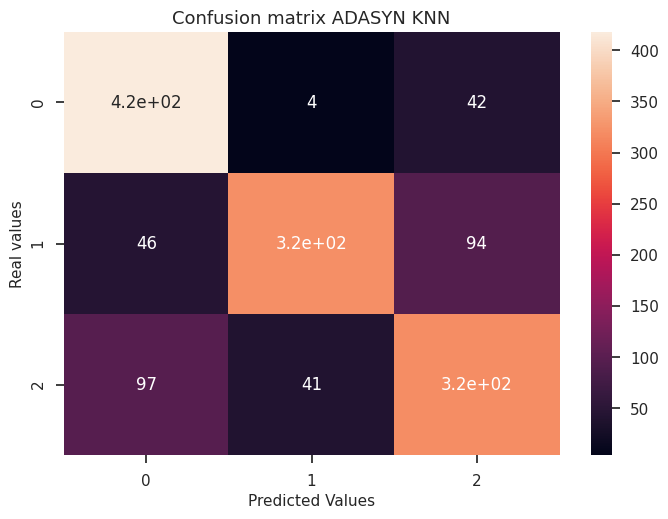

In [ ]:
y_ada_predict_knn = knn.predict(x_ada)
sns.heatmap(confusion_matrix(y_ada, y_ada_predict_knn), 
            annot = True)
plt.title('Confusion matrix ADASYN KNN', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_ada, y_ada_predict_knn))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       464
           1       0.88      0.70      0.78       462
           2       0.70      0.70      0.70       458

    accuracy                           0.77      1384
   macro avg       0.77      0.77      0.76      1384
weighted avg       0.77      0.77      0.76      1384



In [ ]:
accuracies_knn_ada = cross_val_score(knn, X= x_ada, y = y_ada_predict_knn, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"KNN Accuracy:\nmean: {accuracies_knn.mean():.3f}, std: {accuracies_knn.std():.3f}")
print(f"KNN+ADASYN Accuracy:\nmean: {accuracies_knn_ada.mean():.3f}, std: {accuracies_knn_ada.std():.3f}")


KNN Accuracy:
mean: 0.931, std: 0.030
KNN+ADASYN Accuracy:
mean: 0.811, std: 0.018


In [ ]:
accuracies = cross_val_score(rfc, x_ada, y_ada, cv=5)
rfc.fit(x_ada, y_ada)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

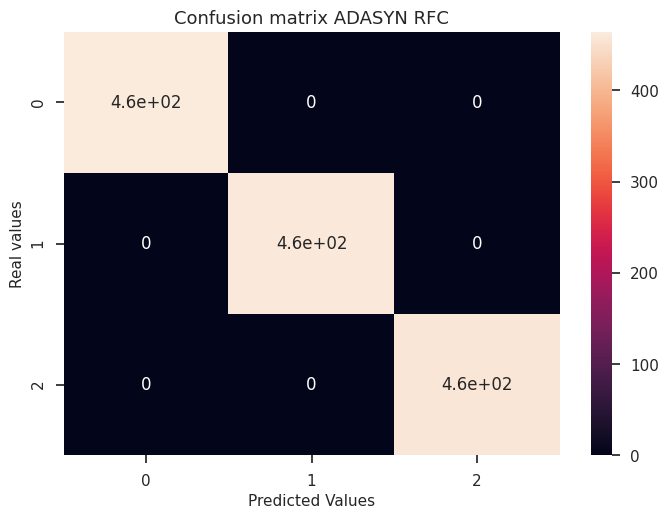

In [ ]:
y_ada_predict_rfc = rfc.predict(x_ada)
sns.heatmap(confusion_matrix(y_ada, y_ada_predict_rfc), 
            annot = True)
plt.title('Confusion matrix ADASYN RFC', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_ada, y_ada_predict_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       464
           1       1.00      1.00      1.00       462
           2       1.00      1.00      1.00       458

    accuracy                           1.00      1384
   macro avg       1.00      1.00      1.00      1384
weighted avg       1.00      1.00      1.00      1384



In [ ]:
accuracies_rfc_ada = cross_val_score(rfc, X= x_ada, y = y_ada_predict_rfc, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"RFC Accuracy:\nmean: {accuracies_rfc.mean():.3f}, std: {accuracies_rfc.std():.3f}")
print(f"RFC+ADASYN Accuracy:\nmean: {accuracies_rfc_ada.mean():.3f}, std: {accuracies_rfc_ada.std():.3f}")


RFC Accuracy:
mean: 0.995, std: 0.005
RFC+ADASYN Accuracy:
mean: 0.998, std: 0.002


In [ ]:
accuracies = cross_val_score(tree, x_ada, y_ada, cv=5)
tree.fit(x_ada, y_ada)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=17, splitter='best')

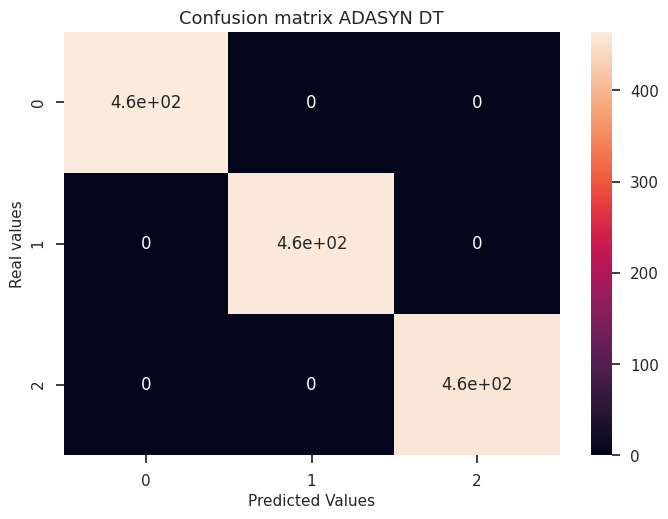

In [ ]:
y_ada_predict_tree = tree.predict(x_ada)
sns.heatmap(confusion_matrix(y_ada, y_ada_predict_tree), 
            annot = True)
plt.title('Confusion matrix ADASYN DT', 
          size = 13)
plt.ylabel('Real values', size = 11)
plt.xlabel('Predicted Values', size = 11)
plt.show()

In [ ]:
print(classification_report(y_ada, y_ada_predict_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       464
           1       1.00      1.00      1.00       462
           2       1.00      1.00      1.00       458

    accuracy                           1.00      1384
   macro avg       1.00      1.00      1.00      1384
weighted avg       1.00      1.00      1.00      1384



In [ ]:
accuracies_tree_ada = cross_val_score(tree, X= x_ada, y = y_ada_predict_tree, 
                             scoring = 'accuracy', cv = cv, 
                             n_jobs = -1)
print(f"DT Accuracy:\nmean: {accuracies_tree.mean():.3f}, std: {accuracies_tree.std():.3f}")
print(f"DT+ADASYN Accuracy:\nmean: {accuracies_tree_ada.mean():.3f}, std: {accuracies_tree_ada.std():.3f}")


DT Accuracy:
mean: 0.996, std: 0.005
DT+ADASYN Accuracy:
mean: 0.999, std: 0.002


In [ ]:
print(f"LR Accuracy:\nmean: {accuracies_lrc.mean():.3f}, std: {accuracies_lrc.std():.3f}")
print(f"LR+ADASYN Accuracy:\nmean: {accuracies_lrc_ada.mean():.3f}, std: {accuracies_lrc_ada.std():.3f}")
print(f"SVC Accuracy:\nmean: {accuracies_svc.mean():.3f}, std: {accuracies_svc.std():.3f}")
print(f"SVC+ADASYN Accuracy:\nmean: {accuracies_svc_ada.mean():.3f}, std: {accuracies_svc_ada.std():.3f}")
print(f"KNN Accuracy:\nmean: {accuracies_knn.mean():.3f}, std: {accuracies_knn.std():.3f}")
print(f"KNN+ADASYN Accuracy:\nmean: {accuracies_knn_ada.mean():.3f}, std: {accuracies_knn_ada.std():.3f}")
print(f"RFC Accuracy:\nmean: {accuracies_rfc.mean():.3f}, std: {accuracies_rfc.std():.3f}")
print(f"RFC+ADASYN Accuracy:\nmean: {accuracies_rfc_ada.mean():.3f}, std: {accuracies_rfc_ada.std():.3f}")
print(f"DT Accuracy:\nmean: {accuracies_tree.mean():.3f}, std: {accuracies_tree.std():.3f}")
print(f"DT+ADASYN Accuracy:\nmean: {accuracies_tree_ada.mean():.3f}, std: {accuracies_tree_ada.std():.3f}")

LR Accuracy:
mean: 0.918, std: 0.014
LR+ADASYN Accuracy:
mean: 0.826, std: 0.012
SVC Accuracy:
mean: 0.982, std: 0.012
SVC+ADASYN Accuracy:
mean: 0.993, std: 0.005
KNN Accuracy:
mean: 0.931, std: 0.030
KNN+ADASYN Accuracy:
mean: 0.811, std: 0.018
RFC Accuracy:
mean: 0.995, std: 0.005
RFC+ADASYN Accuracy:
mean: 0.998, std: 0.002
DT Accuracy:
mean: 0.996, std: 0.005
DT+ADASYN Accuracy:
mean: 0.999, std: 0.002


In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
probas1_ = tree.fit(x_ros, y_ros).predict_proba(x_ros)

In [ ]:
fp0, tp0, thresholds0 = roc_curve(y_ros, probas1_[:, 1], pos_label=0)
roc_auc_model0 = auc(fp0, tp0)
fp1, tp1, thresholds1 = roc_curve(y_ros, probas1_[:, 1], pos_label=1)
roc_auc_model1 = auc(fp1, tp1)
fp2, tp2, thresholds2 = roc_curve(y_ros, probas1_[:, 1], pos_label=2)
roc_auc_model2 = auc(fp2, tp2)

print("AUC for DT Model for Inactive molecule: ",roc_auc_model0)
print("AUC for DT Model for Active molecule: ",roc_auc_model1)
print("AUC for DT Model for Intermediate molecule: ",roc_auc_model2)

AUC for DT Model for Inactive molecule:  0.25
AUC for DT Model for Active molecule:  1.0
AUC for DT Model for Intermediate molecule:  0.25


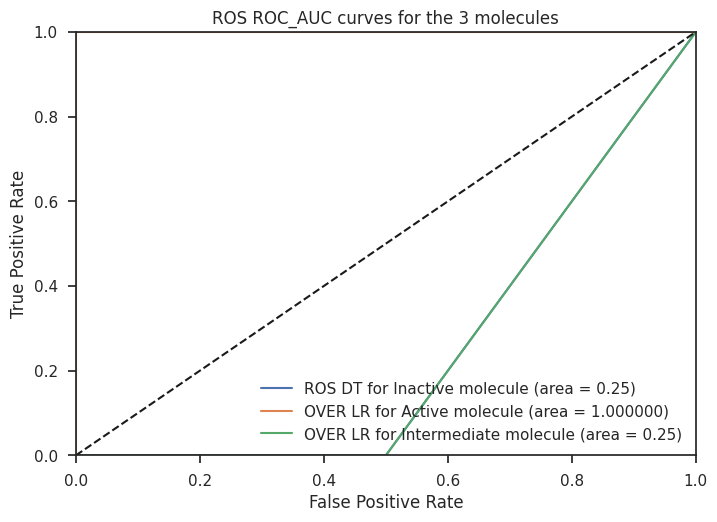

In [ ]:
plt.clf()
plt.plot(fp0, tp0, label='ROS DT for Inactive molecule (area = %0.2f)' % roc_auc_model0)
plt.plot(fp1, tp1, label='OVER LR for Active molecule (area = %1f)' % roc_auc_model1)
plt.plot(fp2, tp2, label='OVER LR for Intermediate molecule (area = %0.2f)' % roc_auc_model2)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROS ROC_AUC curves for the 3 molecules')
plt.legend(loc="lower right")
plt.show()